In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')


In [4]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


from matplotlib import pyplot as plt
_df_0['Passengers'].plot(kind='hist', bins=20, title='Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Passengers'].plot(kind='line', figsize=(8, 4), title='Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Passengers', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [5]:
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**MAKING THE DATA STATIONARY**

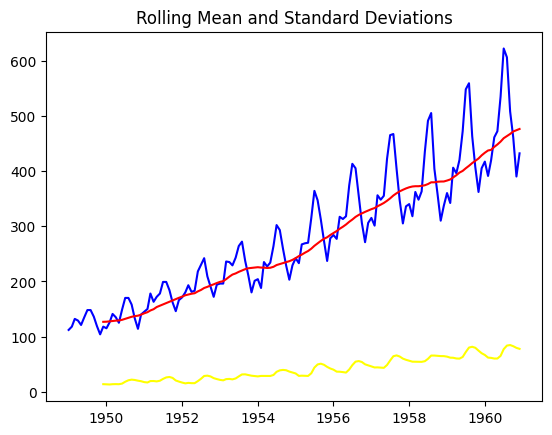

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
None


In [6]:
def stationary_test(timeseries):
  roll_mean=timeseries.rolling(window=12).mean()
  roll_std=timeseries.rolling(window=12).std()

  plt.plot(timeseries,color='blue', label='Original')
  plt.plot(roll_mean,color='red', label='Rollong Mean')
  plt.plot(roll_std, color='yellow', label='roll_std')

  plt.title('Rolling Mean and Standard Deviations')
  plt.show()

  result=adfuller(timeseries)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print(stationary_test(data['Passengers']))

ADF Statistic: 0.815369

This is the test statistic from the ADF test. A more negative value typically indicates stronger evidence against the null hypothesis (which suggests the time series is non-stationary).

p-value: 0.991880

The p-value represents the probability that the observed data could occur under the null hypothesis. Here, the p-value is quite high, close to 1. A high p-value suggests that there is not enough evidence to reject the null hypothesis, meaning the time series is likely non-stationary.
Critical Values:

1%: -3.482
5%: -2.884
10%: -2.579
These are the critical values for different confidence levels. If the ADF statistic is less than (i.e., more negative than) these critical values, it indicates that the null hypothesis can be rejected at that confidence level.
For instance, to reject the null hypothesis at the 5% significance level, the ADF statistic would need to be less than -2.884.

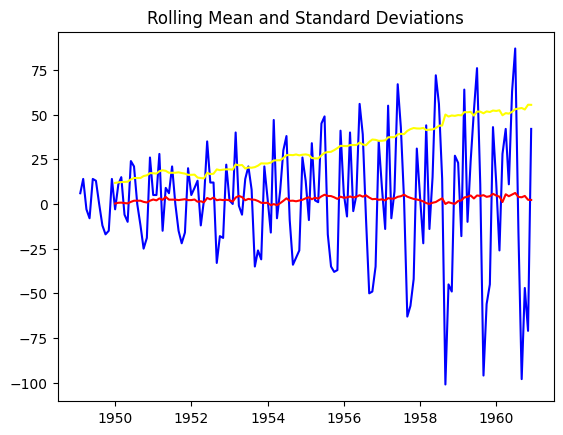

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [7]:
# now we find the data difference and then calculate the Rolling mean and std again as the data above is not stationary
data_diff=data.diff().dropna()
stationary_test(data_diff['Passengers'])


**NOW as ADF is less than 10% then it means it is stationary**

In [10]:
import statsmodels.tsa.arima.model as arima
model = arima.ARIMA(data['Passengers'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Sat, 31 Aug 2024   AIC                           1390.135
Time:                        05:58:00   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

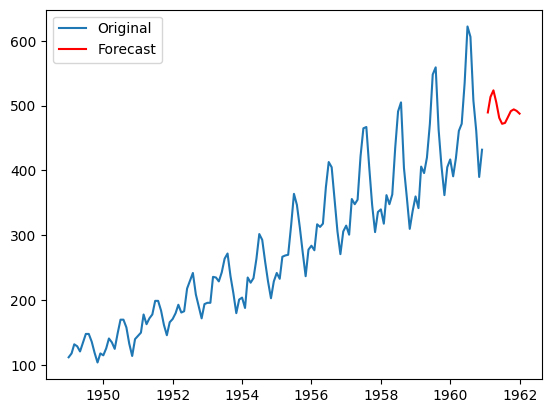

In [11]:
predictions = model_fit.forecast(steps=12)
# now the data has been converted to a stationary data is now ARIMA predicted
plt.plot(data.index, data['Passengers'], label='Original')
forecast_dates = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]
# Plot the predictions
plt.plot(forecast_dates, predictions, color='red', label='Forecast')
plt.legend()
plt.show()